# Interest Rate History

Source: [FreddieMac 30-Year Fixed-Rate Mortgages Since 1971](http://www.freddiemac.com/pmms/pmms30.html)

In [1]:
import requests

url = "http://www.freddiemac.com/pmms/pmms30.html"

resp = requests.get(url)

In [ ]:
from IPython.display import HTML, display
display(HTML(resp.content.decode("utf-8")))

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(resp.content, "html5lib")
# print(soup.prettify())

In [1]:
import pandas as pd
import numpy as np

url = "http://www.freddiemac.com/pmms/pmms30.html"

series: pd.Series | None = None
for table in pd.read_html(url):
    years = table.columns[range(1, len(table.columns), 2)].astype(int)
    months = list(table.iloc[1:13, 0].values)
    
    rate = table.iloc[1:13, range(1, len(table.columns), 2)]
    tab = pd.DataFrame(data=rate.values, columns=years, index=range(1,13)).astype(
        np.float64, errors="ignore"
    ).T.stack()
    
    if series is None:
        series = tab
    else:
        series = pd.concat([series, tab])
series = series.iloc[series.index.argsort()]
display(series)

1971  1       na
      2       na
      3       na
      4     7.31
      5     7.43
            ... 
2021  8     2.84
      9      2.9
      10    3.07
      11    3.07
      12     3.1
Length: 612, dtype: object

In [2]:
interest_rates = pd.Series(series.values, index=pd.to_datetime(series.index.map(lambda d: f"{d[0]}-{d[1]}")))

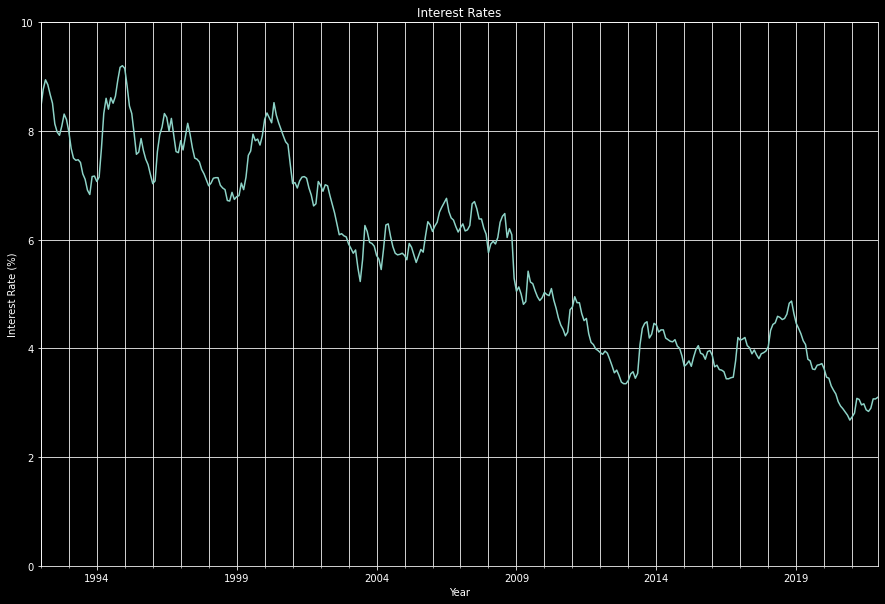

In [18]:
from matplotlib import pyplot as plt

plt.style.use("dark_background")

ax = interest_rates.iloc[-360:].plot(
    grid=True, title="Interest Rates", ylim=[0,10], figsize=(15,10)
)
_ = ax.set(xlabel="Year", ylabel="Interest Rate (%)")
_ = ax.grid('on', which='minor', axis='x')
